Increasing Trend

In [1]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 681 kB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74586 sha256=0f0871e7d0bfd73d624801fb7b1c5309c392c66ed3d6c040bcdb8048a45073d2
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 4.4 MB/s 


In [2]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 5.1 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=8b2e6c51221a7014370205476f0ac4daa1dae44f0783cdd482200eef94cc2eb9
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
khalnat = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khalnat.csv')
khalnat

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,91820.0,91820.0,91820.0,93610.0,1400-1-7,خلنت,22203,2021-03-27,NaN,93610.000000,NaN
1,91740.0,91740.0,91740.0,93580.0,1400-1-8,خلنت,9236,2021-03-28,NaN,93592.000000,NaN
2,91710.0,91710.0,91710.0,93500.0,1400-1-10,خلنت,21502,2021-03-30,NaN,93548.421053,NaN
3,91630.0,91630.0,91630.0,93490.0,1400-1-11,خلنت,3888,2021-03-31,NaN,93524.153846,NaN
4,91630.0,91630.0,91630.0,93480.0,1400-1-14,خلنت,2310,2021-04-03,93532.0,93507.203791,NaN
...,...,...,...,...,...,...,...,...,...,...,...
172,64820.0,64180.0,67280.0,67130.0,1400-10-27,خلنت,1065983,2022-01-17,67136.0,66365.587964,55.631208
173,68480.0,63780.0,68480.0,64280.0,1400-10-28,خلنت,440461,2022-01-18,66574.0,65670.391976,49.691639
174,67490.0,63000.0,67490.0,64590.0,1400-10-29,خلنت,170166,2022-01-19,65492.0,65310.261317,50.313052
175,64470.0,61370.0,67360.0,63310.0,1400-11-2,خلنت,189419,2022-01-22,64678.0,64643.507545,47.693470


In [6]:
khalnat_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خلنت.xlsx')
khalnat_social

,date and time,view
0,۱۹:۴۰:۱۷ ۱۴۰۰/۰۱/۰۱,460
1,۲۲:۵۹:۲۲ ۱۴۰۰/۰۱/۰۱,460
2,۱۲:۴۶:۵۱ ۱۴۰۰/۰۱/۰۲,2363
3,۲۲:۰۰:۰۳ ۱۴۰۰/۰۱/۰۲,782
4,۲۲:۵۵:۵۹ ۱۴۰۰/۰۱/۰۲,782
...,...,...
6639,۱۵:۰۰:۰۹ ۱۴۰۰/۱۱/۰۳,29
6640,۱۵:۰۶:۴۲ ۱۴۰۰/۱۱/۰۳,819
6641,۱۶:۳۰:۱۴ ۱۴۰۰/۱۱/۰۳,1409
6642,۱۸:۱۸:۲۳ ۱۴۰۰/۱۱/۰۳,169


In [7]:
khalnat_social.columns = ['date and time', 'view']
khalnat_social['presian_date'] = khalnat_social['date and time'].apply(lambda x: x.split(" ")[1])
khalnat_social['gregorian_date'] = khalnat_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khalnat_social = khalnat_social[['gregorian_date', 'view']]
khalnat_social = khalnat_social.groupby(by='gregorian_date').mean()
khalnat_social['gregorian_date'] = khalnat_social.index
khalnat_social['gregorian_date'] = khalnat_social['gregorian_date'].astype(str)
khalnat_social['index'] = [i for i in range(len(khalnat_social))]
khalnat_social.set_index('index', inplace=True)
khalnat_social

,view,gregorian_date
index,,
0,460.000000,2021-03-21
1,1309.000000,2021-03-22
2,566.000000,2021-03-23
3,1856.400000,2021-03-24
4,7409.000000,2021-03-25
...,...,...
287,399.500000,2022-01-19
288,2797.083333,2022-01-20
289,1709.375000,2022-01-21


# Merging

In [8]:
khalnat_df=pd.merge(khalnat,khalnat_social, on='gregorian_date', how='inner')
khalnat_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,91820.0,91820.0,91820.0,93610.0,1400-1-7,خلنت,22203,2021-03-27,NaN,93610.000000,NaN,1618.000000
1,91740.0,91740.0,91740.0,93580.0,1400-1-8,خلنت,9236,2021-03-28,NaN,93592.000000,NaN,2028.916667
2,91710.0,91710.0,91710.0,93500.0,1400-1-10,خلنت,21502,2021-03-30,NaN,93548.421053,NaN,2096.000000
3,91630.0,91630.0,91630.0,93490.0,1400-1-11,خلنت,3888,2021-03-31,NaN,93524.153846,NaN,1816.466667
4,91630.0,91630.0,91630.0,93480.0,1400-1-14,خلنت,2310,2021-04-03,93532.0,93507.203791,NaN,999.692308
...,...,...,...,...,...,...,...,...,...,...,...,...
169,64820.0,64180.0,67280.0,67130.0,1400-10-27,خلنت,1065983,2022-01-17,67136.0,66365.587964,55.631208,782.281481
170,68480.0,63780.0,68480.0,64280.0,1400-10-28,خلنت,440461,2022-01-18,66574.0,65670.391976,49.691639,108.100000
171,67490.0,63000.0,67490.0,64590.0,1400-10-29,خلنت,170166,2022-01-19,65492.0,65310.261317,50.313052,399.500000
172,64470.0,61370.0,67360.0,63310.0,1400-11-2,خلنت,189419,2022-01-22,64678.0,64643.507545,47.693470,694.388889


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [9]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [10]:
khalnat_df['view'] = khalnat_df['view'].to_frame()
khalnat_df['SMA5_view'] = khalnat_df['view'].rolling(5).mean()
khalnat_df['EWMA5_view'] = khalnat_df['view'].ewm(span=5).mean()
khalnat_df['RSI_view'] = computeRSI(khalnat_df['view'], 14)

In [11]:
khalnat_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,91820.0,91820.0,91820.0,93610.0,1400-1-7,خلنت,22203,2021-03-27,NaN,93610.000000,NaN,1618.000000,NaN,1618.000000,NaN
1,91740.0,91740.0,91740.0,93580.0,1400-1-8,خلنت,9236,2021-03-28,NaN,93592.000000,NaN,2028.916667,NaN,1864.550000,NaN
2,91710.0,91710.0,91710.0,93500.0,1400-1-10,خلنت,21502,2021-03-30,NaN,93548.421053,NaN,2096.000000,NaN,1974.184211,NaN
3,91630.0,91630.0,91630.0,93490.0,1400-1-11,خلنت,3888,2021-03-31,NaN,93524.153846,NaN,1816.466667,NaN,1908.670769,NaN
4,91630.0,91630.0,91630.0,93480.0,1400-1-14,خلنت,2310,2021-04-03,93532.0,93507.203791,NaN,999.692308,1711.815128,1559.726431,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,64820.0,64180.0,67280.0,67130.0,1400-10-27,خلنت,1065983,2022-01-17,67136.0,66365.587964,55.631208,782.281481,733.472472,826.424320,47.088225
170,68480.0,63780.0,68480.0,64280.0,1400-10-28,خلنت,440461,2022-01-18,66574.0,65670.391976,49.691639,108.100000,556.806052,586.982880,43.775270
171,67490.0,63000.0,67490.0,64590.0,1400-10-29,خلنت,170166,2022-01-19,65492.0,65310.261317,50.313052,399.500000,544.949156,524.488587,45.558195
172,64470.0,61370.0,67360.0,63310.0,1400-11-2,خلنت,189419,2022-01-22,64678.0,64643.507545,47.693470,694.388889,564.238201,581.122021,47.376793


# RSI

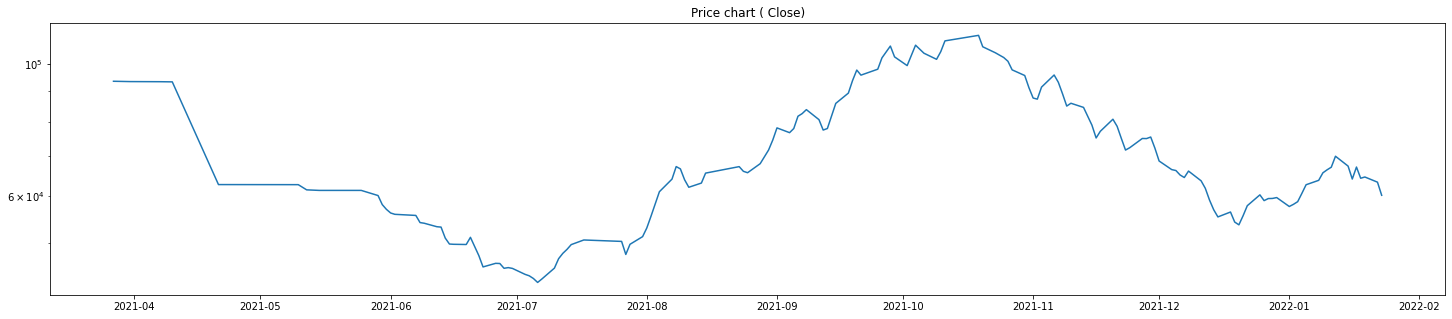

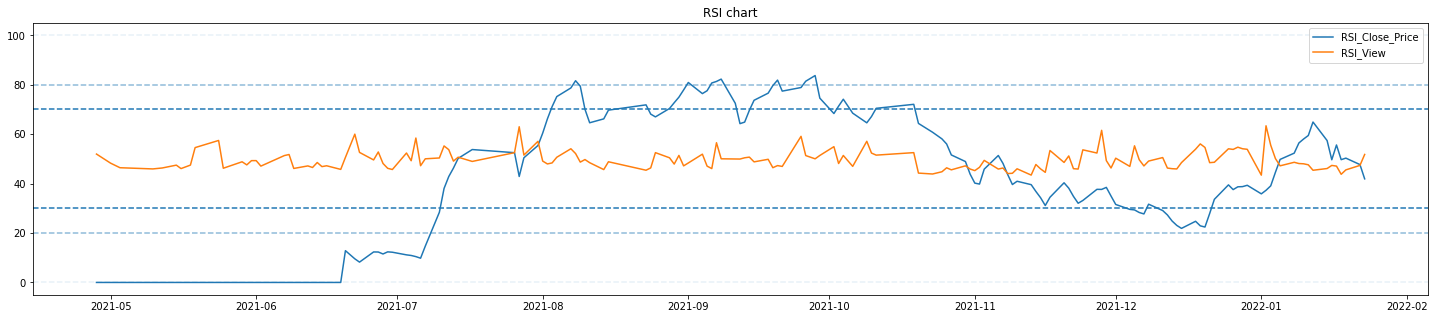

In [12]:
plt.figure(figsize=(25,5))
khalnat_df['date'] = pd.to_datetime(khalnat_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khalnat_df['date'], khalnat_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khalnat_df['date'], khalnat_df['RSI'],label='RSI_Close_Price')
plt.plot(khalnat_df['date'], khalnat_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
# Force lowercase (optional)
khalnat_df.columns = [x.lower() for x in khalnat_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khalnat_df['gregorian_date'],
        y=(khalnat_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khalnat_df['gregorian_date'],
        y=khalnat_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khalnat_df['gregorian_date'],
        y=khalnat_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [ ]:
khalnat_df.columns = [x.lower() for x in khalnat_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khalnat_df['gregorian_date'],
        y=(khalnat_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khalnat_df['gregorian_date'],
        y=khalnat_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khalnat_df['gregorian_date'],
        y=khalnat_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khalnat_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,91820.0,91820.0,91820.0,93610.0,1400-1-7,خلنت,22203,2021-03-27,NaN,93610.000000,NaN,1618.000000,NaN,1618.000000,NaN,2021-03-27
1,91740.0,91740.0,91740.0,93580.0,1400-1-8,خلنت,9236,2021-03-28,NaN,93592.000000,NaN,2028.916667,NaN,1864.550000,NaN,2021-03-28
2,91710.0,91710.0,91710.0,93500.0,1400-1-10,خلنت,21502,2021-03-30,NaN,93548.421053,NaN,2096.000000,NaN,1974.184211,NaN,2021-03-30
3,91630.0,91630.0,91630.0,93490.0,1400-1-11,خلنت,3888,2021-03-31,NaN,93524.153846,NaN,1816.466667,NaN,1908.670769,NaN,2021-03-31
4,91630.0,91630.0,91630.0,93480.0,1400-1-14,خلنت,2310,2021-04-03,93532.0,93507.203791,NaN,999.692308,1711.815128,1559.726431,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,64820.0,64180.0,67280.0,67130.0,1400-10-27,خلنت,1065983,2022-01-17,67136.0,66365.587964,55.631208,782.281481,733.472472,826.424320,47.088225,2022-01-17
170,68480.0,63780.0,68480.0,64280.0,1400-10-28,خلنت,440461,2022-01-18,66574.0,65670.391976,49.691639,108.100000,556.806052,586.982880,43.775270,2022-01-18
171,67490.0,63000.0,67490.0,64590.0,1400-10-29,خلنت,170166,2022-01-19,65492.0,65310.261317,50.313052,399.500000,544.949156,524.488587,45.558195,2022-01-19
172,64470.0,61370.0,67360.0,63310.0,1400-11-2,خلنت,189419,2022-01-22,64678.0,64643.507545,47.693470,694.388889,564.238201,581.122021,47.376793,2022-01-22


In [ ]:
khalnat_df['sma5']=khalnat_df['sma5'].fillna(value=khalnat_df['sma5'].mean())
khalnat_df['rsi']=khalnat_df['rsi'].fillna(value=khalnat_df['rsi'].mean())
khalnat_df['sma5_view']=khalnat_df['sma5_view'].fillna(value=khalnat_df['sma5_view'].mean())
khalnat_df['rsi_view']=khalnat_df['rsi_view'].fillna(value=khalnat_df['rsi_view'].mean())

In [ ]:
khalnat_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,91820.0,91820.0,91820.0,93610.0,1400-1-7,خلنت,22203,2021-03-27,70062.529412,93610.000000,41.425208,1618.000000,1683.451725,1618.000000,49.561689,2021-03-27
1,91740.0,91740.0,91740.0,93580.0,1400-1-8,خلنت,9236,2021-03-28,70062.529412,93592.000000,41.425208,2028.916667,1683.451725,1864.550000,49.561689,2021-03-28
2,91710.0,91710.0,91710.0,93500.0,1400-1-10,خلنت,21502,2021-03-30,70062.529412,93548.421053,41.425208,2096.000000,1683.451725,1974.184211,49.561689,2021-03-30
3,91630.0,91630.0,91630.0,93490.0,1400-1-11,خلنت,3888,2021-03-31,70062.529412,93524.153846,41.425208,1816.466667,1683.451725,1908.670769,49.561689,2021-03-31
4,91630.0,91630.0,91630.0,93480.0,1400-1-14,خلنت,2310,2021-04-03,93532.000000,93507.203791,41.425208,999.692308,1711.815128,1559.726431,49.561689,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,64820.0,64180.0,67280.0,67130.0,1400-10-27,خلنت,1065983,2022-01-17,67136.000000,66365.587964,55.631208,782.281481,733.472472,826.424320,47.088225,2022-01-17
170,68480.0,63780.0,68480.0,64280.0,1400-10-28,خلنت,440461,2022-01-18,66574.000000,65670.391976,49.691639,108.100000,556.806052,586.982880,43.775270,2022-01-18
171,67490.0,63000.0,67490.0,64590.0,1400-10-29,خلنت,170166,2022-01-19,65492.000000,65310.261317,50.313052,399.500000,544.949156,524.488587,45.558195,2022-01-19
172,64470.0,61370.0,67360.0,63310.0,1400-11-2,خلنت,189419,2022-01-22,64678.000000,64643.507545,47.693470,694.388889,564.238201,581.122021,47.376793,2022-01-22


In [ ]:
khalnat_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price

In [ ]:
khalnat_new = khalnat_df[['gregorian_date','close']]

print("Shape of dataframe:", khalnat_new.shape)

Shape of dataframe: (174, 2)


In [ ]:
del khalnat_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khalnat_new=scaler.fit_transform(np.array(khalnat_new).reshape(-1,1))


In [ ]:
def split(y, train_size=0.75):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

# convert an array of values into a dataset matrix
def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]  
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khalnat_new, train_size=0.75)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (130, 1)
test_data:  (44, 1)
X_train:  (114, 15)
y_train:  (114,)
X_test:  (28, 15)
y_test (28,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the model

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


# fitting the model

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
4/4 [==============================] - 9s 552ms/step - loss: 0.2266 - val_loss: 0.0262
Epoch 2/50
4/4 [==============================] - 0s 36ms/step - loss: 0.1120 - val_loss: 0.0056
Epoch 3/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0456 - val_loss: 0.0621
Epoch 4/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0647 - val_loss: 0.0473
Epoch 5/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0413 - val_loss: 0.0113
Epoch 6/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0389 - val_loss: 0.0058
Epoch 7/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0372 - val_loss: 0.0078
Epoch 8/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0271 - val_loss: 0.0154
Epoch 9/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0260 - val_loss: 0.0178
Epoch 10/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0255 - val_loss: 0.0104
Epoch 11/50
4/4 [===========

loss

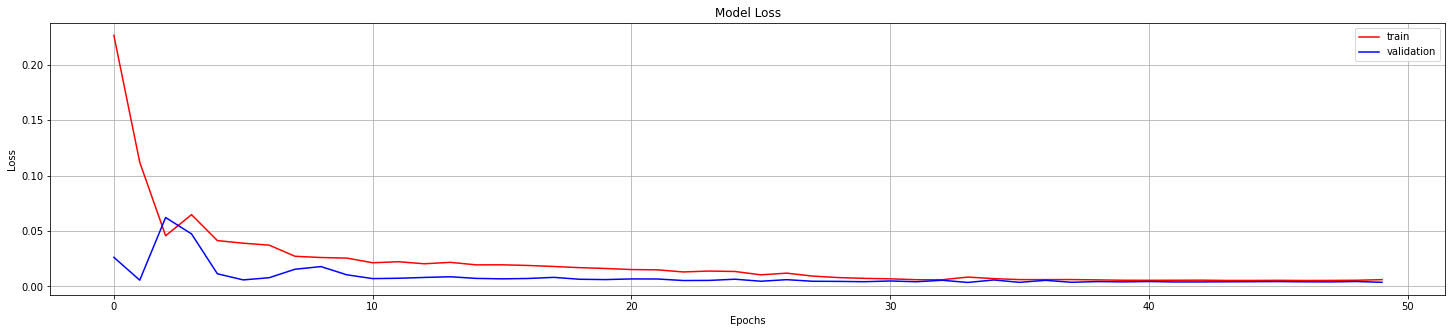

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.11039928882397176


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.36862805485725403], [0.3530621826648712], [0.3429435193538666], [0.33905133605003357], [0.3395307660102844]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khalnat_new[len(khalnat_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days of close price','Predicted next 5 days close price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khalnat stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =60170 , 4 bahmn = 61289   (increase  > 0.5 we assaign +1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =60170 ,  our model prediction for 4 bahmn(timestamp=16) = 683254 (increase > 0.5 we assaign +1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%

## Part 2 prediction with adding social indicators

In [ ]:
khalnat_new = khalnat_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


In [ ]:
del khalnat_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khalnat_new=scaler.fit_transform(np.array(khalnat_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khalnat_new, train_size=0.80)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (556, 1)
test_data:  (140, 1)
X_train:  (540, 15)
y_train:  (540,)
X_test:  (124, 15)
y_test (124,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
17/17 [==============================] - 13s 122ms/step - loss: 0.0935 - val_loss: 0.0612
Epoch 2/50
17/17 [==============================] - 1s 30ms/step - loss: 0.0942 - val_loss: 0.0633
Epoch 3/50
17/17 [==============================] - 1s 31ms/step - loss: 0.0915 - val_loss: 0.0602
Epoch 4/50
17/17 [==============================] - 1s 31ms/step - loss: 0.0916 - val_loss: 0.0605
Epoch 5/50
17/17 [==============================] - 1s 32ms/step - loss: 0.0903 - val_loss: 0.0600
Epoch 6/50
17/17 [==============================] - 1s 31ms/step - loss: 0.0900 - val_loss: 0.0628
Epoch 7/50
17/17 [==============================] - 1s 32ms/step - loss: 0.0841 - val_loss: 0.0504
Epoch 8/50
17/17 [==============================] - 1s 31ms/step - loss: 0.0732 - val_loss: 0.0351
Epoch 9/50
17/17 [==============================] - 1s 31ms/step - loss: 0.0523 - val_loss: 0.0290
Epoch 10/50
17/17 [==============================] - 1s 30ms/step - loss: 0.0418 - val_loss: 0.0252
Epoch 1

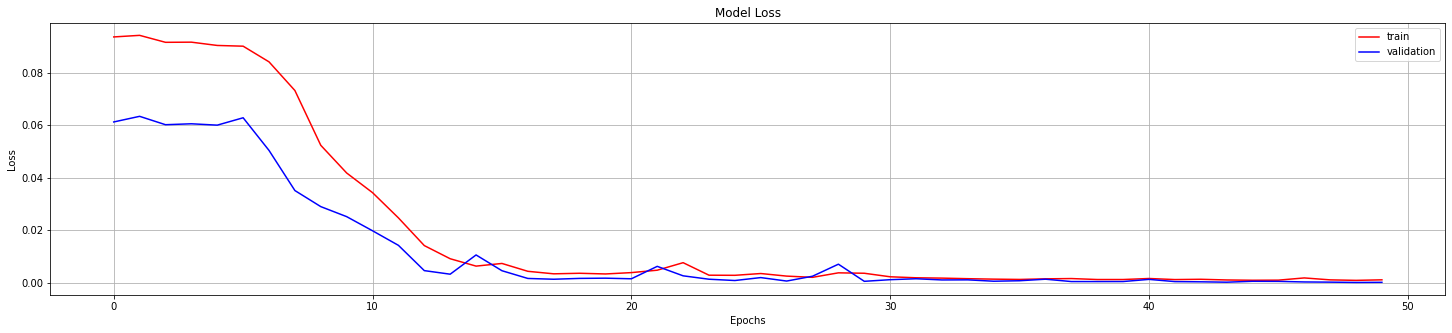

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:

predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.9967036652859096


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.006658037193119526], [-0.0040345871821045876], [0.6187354922294617], [0.013937397859990597], [0.006800211034715176]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khalnat_new[len(khalnat_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khalnat stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =60170 , 4 bahmn = 61289   (increase  > 0.5 we assaign +1 (based on pdf))
##### Real close_price with indicators  --> 3 bahman (timestamp=15) in our data =686 ,  our model prediction for 4 bahmn(timestamp=16) = 716 (increase > 0.5 we assaign +1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%